# Converting COCO annotations to mask
https://stackoverflow.com/questions/50805634/how-to-create-mask-images-from-coco-dataset/69175547#69175547

In [1]:
# !pip install pycocotools
# !pip install opencv-python

from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

import json

## Visualizing COCO Properties

In [2]:
#load the annotations json file
file = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/body_attached_coco/instances_default.json'
f = open(file)
ann_data = json.load(f)
print(ann_data.keys())
# ann_data['images']

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])


In [3]:
ann_data['categories']

[{'id': 1, 'name': 'generic', 'supercategory': ''},
 {'id': 2, 'name': 'right_forewing', 'supercategory': ''},
 {'id': 3, 'name': 'left_forewing', 'supercategory': ''},
 {'id': 4, 'name': 'right_hindwing', 'supercategory': ''},
 {'id': 5, 'name': 'left_hindwing', 'supercategory': ''},
 {'id': 6, 'name': 'ruler', 'supercategory': ''},
 {'id': 7, 'name': 'white_balance', 'supercategory': ''},
 {'id': 8, 'name': 'label', 'supercategory': ''},
 {'id': 9, 'name': 'color_card', 'supercategory': ''},
 {'id': 10, 'name': 'body', 'supercategory': ''}]

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


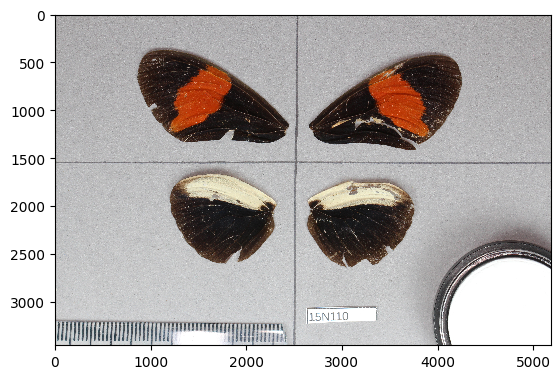

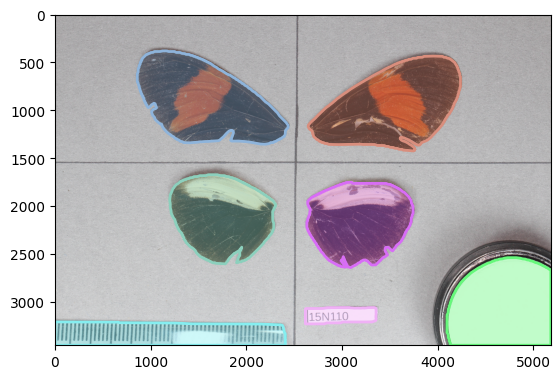

In [66]:
#load the annotations with COCO
file = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/damaged_coco/instances_default.json'
coco = COCO(file)

#load an image with COCO
img_dir='/Users/michelleramirez/Documents/butterflies/annotation_data/damaged_wings/'
img_id=1 #the image ID for 1012.jpg is 1 (you can verify this by looking at the json file 'images' section)
img = coco.imgs[img_id]
img

#display the loaded image
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

#display the image with the annotation overlayed
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

[0 1]
[0 1]


[0 1]
[0 1]


[0 1]
[0 1 2]


[0 1]
[0 1 2]


[0 1]
[0 1 2]


[0 1]
[0 1 2]


[0 1]
[0 1 2]


There are 7 total masks for image 1


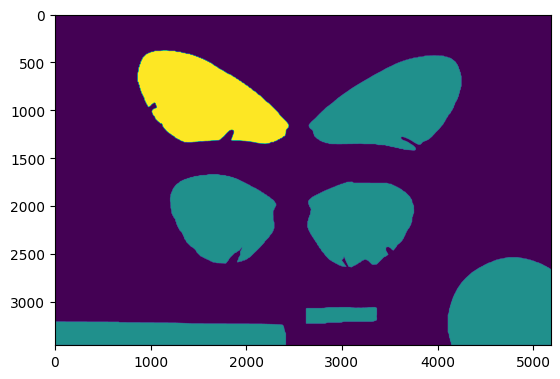

In [24]:
#to show the mask only for all annotated segmentations for our selected image
mask = coco.annToMask(anns[2])
for i in range(len(anns)):
    print(np.unique(coco.annToMask(anns[i])))
    mask += coco.annToMask(anns[i])
    print(np.unique(mask))
    print('\n')

print(f'There are {len(anns)} total masks for image {img_id}')
plt.imshow(mask)

In [9]:
np.unique(mask)

array([0, 1, 2, 3], dtype=uint8)

In [16]:
mask.shape
# image.shape

(233, 295)

In [ ]:
mask = coco.annToMask(anns[2])
resized_mask = cv2.resize(mask , (128,128))
resized_image = cv2.resize(image, (128,128))

plt.imshow(mask)
plt.imshow(resized_mask)
plt.imshow(image)
plt.imshow(resized_image)

## Getting BINARY Masks and Saving
Didn't end up using this section. Masks were created using the `Creating Masks for Multi-label Segmentation` instead.

(Binary masks: 1 where annotation exists, 0 otherwise) 

Question: Should we save one mask per image, with all annotated components, OR should we seperated each annotation and save it as a mask seperate s.t each image will have multiple files saved containing each different mask?

In [5]:
def anns_to_mask(coco_json_file, save_mask_dir, save=False):
    '''Function to convert COCO Annotations to Masks. Masks are saved under the original 
    image name in the provided save_mask_dir.'''
    
    #load the annotations with COCO
    coco = COCO(coco_json_file)
    image_ids = coco.imgs.keys()
    category_ids = coco.getCatIds()

    #make sure our folder to save masks exists
    os.makedirs(save_mask_dir, exist_ok=True)

    for img_id in image_ids:
        #get the annotations for the img
        img = coco.imgs[img_id]
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=category_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)

        #get the masks belonging to each annotation
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask += coco.annToMask(anns[i])

        #save the mask
        if save:
            fp = f"{save_mask_dir}/{img['file_name']}"
            mask = (mask * 255).astype(np.uint8)
            im = Image.fromarray(mask)
            im.save(fp)


In [7]:
# Get Masks for All COCO JSON Files
mask_dir = '/Users/michelleramirez/Documents/butterflies/annotation_data/masks'

body_attached_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/body_attached_coco/instances_default.json'
damaged_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/damaged_coco/instances_default.json'
dorsal_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/dorsal_coco/instances_default.json'
incomplete_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/incomplete_coco/instances_default.json'

anns_to_mask(body_attached_coco_json, f"{mask_dir}/body_attached", True)
anns_to_mask(damaged_coco_json, f"{mask_dir}/damaged", True)
anns_to_mask(dorsal_coco_json, f"{mask_dir}/dorsal", True)
anns_to_mask(incomplete_coco_json, f"{mask_dir}/incomplete", True)


loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


# Creating Masks for Multi-label Segmentation

We have to map each pixel value to the category ID

### Example

In [ ]:
#resizing  
mask = coco.annToMask(anns[2])
resized_mask = cv2.resize(mask , (128,128))
resized_image = cv2.resize(image, (128,128))

plt.imshow(mask)
plt.imshow(resized_mask)
plt.imshow(image)
plt.imshow(resized_image)

In [74]:
#load the annotations with COCO
coco_json_file = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/damaged_coco/instances_default.json'

coco = COCO(coco_json_file)
image_ids = coco.imgs.keys()
category_ids = coco.getCatIds()

#get the annotations for the img (id1)
img_id = 1
img = coco.imgs[img_id]
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=category_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)

#get and scale the masks (by category) belonging to each annotation
multiclass_mask = (anns[0]['category_id']) * coco.annToMask(anns[0])
multiclass_mask = cv2.resize(multiclass_mask, (128,128), interpolation= cv2.INTER_NEAREST)

print('\ncategory id:', anns[0]['category_id'])
print('0: ', np.unique(multiclass_mask))
print('\n')

for i in range(1, len(anns)):
    
    category_mask = (anns[i]['category_id']) * coco.annToMask(anns[i])
    category_mask = cv2.resize(category_mask, (128,128), interpolation= cv2.INTER_NEAREST)
    multiclass_mask += category_mask

    for y in range(0, category_mask.shape[0]):
        for x in range(0, category_mask.shape[1]):
            #if there masks overlap at y,x
            if category_mask[y, x] != 0 and multiclass_mask[y,x] != 0:
                #replace that value to avoid pixel values not in our id2label mapping
                multiclass_mask[y,x] = category_mask[y,x]

    print('category id:', anns[i]['category_id'])
    print(np.unique(category_mask))
    print(np.unique(multiclass_mask))
    print('\n')

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!

category id: 6
0:  [0 6]


category id: 7
[0 7]
[0 6 7]


category id: 3
[0 3]
[0 3 6 7]


category id: 8
[0 8]
[0 3 6 7 8]


category id: 5
[0 5]
[0 3 5 6 7 8]


category id: 4
[0 4]
[0 3 4 5 6 7 8]


category id: 2
[0 2]
[0 2 3 4 5 6 7 8]




In [76]:
multiclass_mask.shape
np.unique(multiclass_mask)

array([0, 2, 3, 4, 5, 6, 7, 8], dtype=uint8)

In [90]:
path = 'multiclass_imwrite.png'

#save our resized mask (PIL) as PNG to avoid changing pixel values (PNG is a lossless format)
im = Image.fromarray(multiclass_mask)
im.save(path)

In [91]:
#open the saved mask back up
# path = '/Users/michelleramirez/Documents/butterflies/annotation_data/masks_128_128/damaged/15N110_d.png'

multiclass_mask = Image.open(path)
np.unique(np.array(multiclass_mask))

array([0, 2, 3, 4, 5, 6, 7, 8], dtype=uint8)

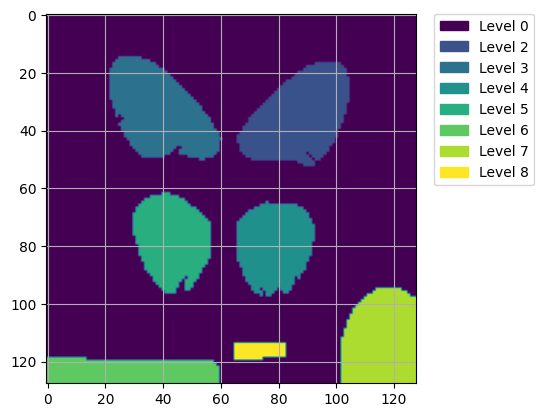

[0 2 3 4 5 6 7 8]
[0 2 3 4 5 6 7 8]


In [92]:
import matplotlib.patches as mpatches

#show the merged multiclass mask
im = plt.imshow(multiclass_mask)

# get the colors of the values, according to the colormap used by imshow
values = np.unique(multiclass_mask)
colors = [im.cmap(im.norm(value)) for value in values]

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

#plot legend
plt.grid(True)
plt.show()

print(values)
print(np.unique(multiclass_mask))

In [29]:
multiclass_mask.shape

(128, 128)

In [34]:
id2label = dict()
id2label[0] = 'background' #add class for background

coco_categories = coco.loadCats(coco.getCatIds())
for category_item in coco_categories:
    cat_id = category_item['id']
    cat_name = category_item['name']
    id2label[cat_id] = cat_name

y = 117 #vertical axis
x = 80 #horizontal axis 
print(f'pixel value:           {multiclass_mask[y, x]}')
print(f'category   :           {id2label[multiclass_mask[y,x]]}')

pixel value:           8
category   :           label


In [45]:
id2label

{0: 'background',
 1: 'generic',
 2: 'right_forewing',
 3: 'left_forewing',
 4: 'right_hindwing',
 5: 'left_hindwing',
 6: 'ruler',
 7: 'white_balance',
 8: 'label',
 9: 'color_card',
 10: 'body'}

### Mapping of ID (also doubles as pixel value) to Category aka Label

In [67]:
id2label = dict()
id2label[0] = 'background' #add class for background

coco_categories = coco.loadCats(coco.getCatIds())
for category_item in coco_categories:
    cat_id = category_item['id']
    cat_name = category_item['name']
    id2label[cat_id] = cat_name

id2label

{0: 'background',
 1: 'generic',
 2: 'right_forewing',
 3: 'left_forewing',
 4: 'right_hindwing',
 5: 'left_hindwing',
 6: 'ruler',
 7: 'white_balance',
 8: 'label',
 9: 'color_card'}

In [83]:
img['file_name'].split('.')[0]

'15N110_d'

In [84]:
def anns_to_multiclass_mask(coco_json_file, save_mask_dir, mask_size=(128,128), save=False):
    '''Function to convert COCO Annotations to Masks. Masks are saved under the original 
    image name in the provided save_mask_dir. Masks are also resized'''
    
    #load the annotations with COCO
    coco = COCO(coco_json_file)
    image_ids = coco.imgs.keys()
    category_ids = coco.getCatIds()

    #make sure our folder to save masks exists
    os.makedirs(save_mask_dir, exist_ok=True)

    for img_id in image_ids:
        #get the annotations for the img
        img = coco.imgs[img_id]
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=category_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)

        #get and scale the masks (by category) belonging to each annotation
        multiclass_mask = (anns[0]['category_id']) * coco.annToMask(anns[0])
        multiclass_mask = cv2.resize(multiclass_mask, mask_size, interpolation=cv2.INTER_NEAREST)
        for i in range(1, len(anns)):
            category_mask = (anns[i]['category_id']) * coco.annToMask(anns[i])
            category_mask = cv2.resize(category_mask, mask_size, interpolation=cv2.INTER_NEAREST)
            multiclass_mask += category_mask

            for y in range(0, category_mask.shape[0]):
                for x in range(0, category_mask.shape[1]):
                    #if there masks overlap at y,x
                    if category_mask[y, x] != 0 and multiclass_mask[y,x] != 0:
                        #replace that value to avoid pixel values not in our id2label mapping
                        multiclass_mask[y,x] = category_mask[y,x]

        #save the mask
        if save:
            name = img['file_name'].split('.')[0]
            fp = f"{save_mask_dir}/{name}.png" #save as png to avoid changing pixel values
            im = Image.fromarray(multiclass_mask)
            im.save(fp)


In [86]:
# Get (RESIZED) Masks for All COCO JSON Files
mask_dir = '/Users/michelleramirez/Documents/butterflies/annotation_data/masks_128_128'

body_attached_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/body_attached_coco/instances_default.json'
damaged_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/damaged_coco/instances_default.json'
dorsal_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/dorsal_coco/instances_default.json'
incomplete_coco_json = '/Users/michelleramirez/Documents/butterflies/annotation_data/coco_annotations_cvat/incomplete_coco/instances_default.json'

anns_to_multiclass_mask(body_attached_coco_json, f"{mask_dir}/body_attached", (128,128), True)
anns_to_multiclass_mask(damaged_coco_json, f"{mask_dir}/damaged", (128,128), True)
anns_to_multiclass_mask(dorsal_coco_json, f"{mask_dir}/dorsal", (128,128), True)
anns_to_multiclass_mask(incomplete_coco_json, f"{mask_dir}/incomplete", (128,128), True)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


## Resize Original Images to Match our Resized Multiclass Masks

Convert all images to be 128 x 128

In [87]:
import glob 
def resize_images(source_image_folder, resized_image_folder, file_extensions=['.jpg'], image_size=(128,128)):
    #create a new folder to save resized images to
    os.makedirs(resized_image_folder, exist_ok=True)

    #begin resizing
    for extension in file_extensions:
        for filename in glob.glob(f'{source_image_folder}/*{extension}'):
            print(filename)
            image = Image.open(filename)
            image = np.array(image) #convert to numpy to resize
            image = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)

            image_name = filename.split("/")[-1] #get rid of everything but the name of the file
            image_name = image_name.split(".")[0] #get rid of the extension
            print(f"{resized_image_folder}/{image_name}")
            image = Image.fromarray(image) #convert img back to PIL Image to save
            image.save(f"{resized_image_folder}/{image_name}.png") #save as a png image to avoid pixel val changes
    
    return

In [88]:
body_attached_source = '/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached'
damaged_source = '/Users/michelleramirez/Documents/butterflies/annotation_data/damaged_wings'
dorsal_source = '/Users/michelleramirez/Documents/butterflies/annotation_data/other_dorsal'
incomplete_source = '/Users/michelleramirez/Documents/butterflies/annotation_data/incomplete_wing_set'

body_attached_resized = '/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached'
damaged_resized = '/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/damaged'
dorsal_resized = '/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/dorsal'
incomplete_resized = '/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/incomplete'

file_extensions = ['.jpg', '.JPG', '.png', '.JPEG'] #since there are different extensions in our dataset
resize_images(body_attached_source, body_attached_resized, file_extensions)
resize_images(damaged_source, damaged_resized, file_extensions)
resize_images(dorsal_source, dorsal_resized, file_extensions)
resize_images(incomplete_source, incomplete_resized, file_extensions)

/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/2100.jpg
/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached/2100
/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/2114.jpg
/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached/2114
/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/1421.jpg
/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached/1421
/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/2276.jpg
/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached/2276
/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/1757.jpg
/Users/michelleramirez/Documents/butterflies/annotation_data/images_128_128/body_attached/1757
/Users/michelleramirez/Documents/butterflies/annotation_data/body_attached/1780.jpg
/Users/michelleramire